# One Health Job Assessment

---

### Data Cleaning and Preparation

In [104]:
# Importing dependables

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile  # for dealing with zip files
from datetime import timedelta  # for dealing with time series calculations

import warnings
# Suppress all warnings within a code block
warnings.filterwarnings("ignore")

In [105]:
# Open the zip file in read mode

with zipfile.ZipFile("onehealthzip.zip", 'r'):  # this code opens the zip file
    df = pd.read_excel('Assessment Data.xlsx')  # this code reads the excel file into a data frame

In [106]:
df.head()

,HMO ID,Prescription Code,Name,Date created,STATUS,Delivery Status,Delivery Time,Unnamed: 7
0,10007RUTA,90A67E39,Aretola,2024-05-01 05:24:01,Dispensed,Delivered,2024-05-01 17:00:00,NaN
1,10136AVLC,294E6A17,Ijete,2024-05-01 06:29:03,Dispensed,Delivered,2024-05-01 13:23:00,NaN
2,10047IPOB,A98A9111,Afiomah,2024-05-01 06:31:34,Dispensed,Delivered,2024-05-02 16:12:00,"Enrollee number not connecting, reroute 2nd"
3,10026CSHB,D34456FA,Olaomi,2024-05-01 06:37:31,Dispensed,Delivered,NaT,NaN
4,10054PVLA,850258F2,Abdullahi,2024-05-01 06:56:48,Dispensed,Delivered,2024-05-01 12:00:00,NaN


In [107]:
# Check for the dimension of the data set

print(f"The total number of column in the df is: {df.shape[1]}")
print(f"The total number of rows in the df is: {df.shape[0]}")

The total number of column in the df is: 8
The total number of rows in the df is: 6198


In [108]:
# check the data for inconsistencies like Null values and column name formats

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6198 entries, 0 to 6197
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   HMO ID             6197 non-null   object        
 1   Prescription Code  6196 non-null   object        
 2   Name               6198 non-null   object        
 3   Date created       6198 non-null   datetime64[ns]
 4   STATUS             6198 non-null   object        
 5   Delivery Status    6193 non-null   object        
 6   Delivery Time      5702 non-null   datetime64[ns]
 7   Unnamed: 7         194 non-null    object        
dtypes: datetime64[ns](2), object(6)
memory usage: 387.5+ KB


### Observations
- the date columns are not in the correct format
- there some Null values in the Delivery Time Column
- the feature names are not consistent
- the last column unnamed: 7 is irrelevant to the task

# Data Cleaning and Preparation

In [109]:
# Checking for missing Values

print(df.isnull().sum())

HMO ID                  1
Prescription Code       2
Name                    0
Date created            0
STATUS                  0
Delivery Status         5
Delivery Time         496
Unnamed: 7           6004
dtype: int64


In [110]:
# calculate the percentages of missing values

missing_value_percentages = (df.isnull().sum() / df.shape[0]) * 100
print(missing_value_percentages)

HMO ID                0.016134
Prescription Code     0.032268
Name                  0.000000
Date created          0.000000
STATUS                0.000000
Delivery Status       0.080671
Delivery Time         8.002581
Unnamed: 7           96.869958
dtype: float64


In [111]:
# We will also drop the unnamed: 7 column.
# Since the percentage of null values in the Delivery Time is not up to 20% of 
# The total number of roles in the data set we will drop the null values.

# Create a funtion that will take a data frame object:
# remove the null values and unnecessary columns, 
# Standardize the date time columns i.e convert the datetime columns to datetime data type

def remove_nullValues_unneccessary_col (df):
    '''This function takes in a data frame and remove the unwanted features and null values
       Convert the date time features to the date time format
    '''
    # drop the column
    df = df.drop("Unnamed: 7", axis = 1)
    df = df.dropna()
    # Standardize date and time formats
    df['Date created'] = pd.to_datetime(df['Date created'])
    df['Delivery Time'] = pd.to_datetime(df['Delivery Time'])
    
    return df


In [112]:
# pass the data frame through the function
df = remove_nullValues_unneccessary_col(df)
df.head()

,HMO ID,Prescription Code,Name,Date created,STATUS,Delivery Status,Delivery Time
0,10007RUTA,90A67E39,Aretola,2024-05-01 05:24:01,Dispensed,Delivered,2024-05-01 17:00:00
1,10136AVLC,294E6A17,Ijete,2024-05-01 06:29:03,Dispensed,Delivered,2024-05-01 13:23:00
2,10047IPOB,A98A9111,Afiomah,2024-05-01 06:31:34,Dispensed,Delivered,2024-05-02 16:12:00
4,10054PVLA,850258F2,Abdullahi,2024-05-01 06:56:48,Dispensed,Delivered,2024-05-01 12:00:00
5,10506OPAA,175FBA94,FAGBAMIGBE,2024-05-01 06:57:10,Dispensed,Delivered,2024-05-01 14:23:00


In [113]:
# check for inconsistencies

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5700 entries, 0 to 6197
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   HMO ID             5700 non-null   object        
 1   Prescription Code  5700 non-null   object        
 2   Name               5700 non-null   object        
 3   Date created       5700 non-null   datetime64[ns]
 4   STATUS             5700 non-null   object        
 5   Delivery Status    5700 non-null   object        
 6   Delivery Time      5700 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(5)
memory usage: 356.2+ KB


In [114]:
# check if there are still null values

df.isnull().sum()

HMO ID               0
Prescription Code    0
Name                 0
Date created         0
STATUS               0
Delivery Status      0
Delivery Time        0
dtype: int64

In [115]:
df.columns

Index(['HMO ID', 'Prescription Code', 'Name', 'Date created', 'STATUS',
       'Delivery Status', 'Delivery Time'],
      dtype='object')

In [116]:
# Sine the column names are inconsistent, lets make it consistent as follows:

old_names = df.columns
new_names = [name.replace(' ', '_').lower() for name in old_names]  # this syntax fixes the inconsistencies in the column names

df.columns = new_names
df.columns

Index(['hmo_id', 'prescription_code', 'name', 'date_created', 'status',
       'delivery_status', 'delivery_time'],
      dtype='object')

In [117]:
df.head()

,hmo_id,prescription_code,name,date_created,status,delivery_status,delivery_time
0,10007RUTA,90A67E39,Aretola,2024-05-01 05:24:01,Dispensed,Delivered,2024-05-01 17:00:00
1,10136AVLC,294E6A17,Ijete,2024-05-01 06:29:03,Dispensed,Delivered,2024-05-01 13:23:00
2,10047IPOB,A98A9111,Afiomah,2024-05-01 06:31:34,Dispensed,Delivered,2024-05-02 16:12:00
4,10054PVLA,850258F2,Abdullahi,2024-05-01 06:56:48,Dispensed,Delivered,2024-05-01 12:00:00
5,10506OPAA,175FBA94,FAGBAMIGBE,2024-05-01 06:57:10,Dispensed,Delivered,2024-05-01 14:23:00


##### Lead Time Calculation

In [118]:
# Calculate lead time
df['lead_time'] = (df['delivery_time'] - df['date_created']).dt.total_seconds() / 3600

# Adjust lead time for orders created after 4 PM
def adjust_lead_time(row):
    """
    Adjusts lead time for orders created after 4 PM and not delivered on the same day.

    This function takes a single row (Series) from the DataFrame as input and modifies
    the 'lead_time' value based on specific conditions.

    Args:
        row (pandas.Series): A row from the DataFrame containing order information.

    Returns:
        float: The adjusted lead time in hours (or None if delivery time is missing).
    """

    # Check if order creation time is after 4 PM (16:00)
    if row['date_created'].hour >= 16:
        # Check if delivery occurred on the same day (date comparison)
        if row['delivery_time'].date() != row['date_created'].date():
            # Calculate the adjusted creation time (8 AM next day)
            next_day_8_am = row['date_created'].replace(hour=8, minute=0, second=0, microsecond=0) + pd.Timedelta(days=1)

            # Calculate lead time in seconds and convert to hours
            lead_time_seconds = (row['delivery_time'] - next_day_8_am).total_seconds()
            lead_time_hours = lead_time_seconds / 3600

            # Return the adjusted lead time in hours
            return lead_time_hours
        else:
            # Delivery occurred on the same day, no adjustment needed
            return row['lead_time']
    else:
        # Order created before 4 PM, no adjustment needed
        return row['lead_time']

    # This line is unreachable in practice, but included to complete the algorithm
    return None  # Handle cases where delivery time is missing by returning none


In [119]:
# Apply the function to each row with a new column 'lead_time'
df['lead_time'] = df.apply(adjust_lead_time, axis=1)

# print first 5 rows to check the result
df.head()

,hmo_id,prescription_code,name,date_created,status,delivery_status,delivery_time,lead_time
0,10007RUTA,90A67E39,Aretola,2024-05-01 05:24:01,Dispensed,Delivered,2024-05-01 17:00:00,11.599722
1,10136AVLC,294E6A17,Ijete,2024-05-01 06:29:03,Dispensed,Delivered,2024-05-01 13:23:00,6.899167
2,10047IPOB,A98A9111,Afiomah,2024-05-01 06:31:34,Dispensed,Delivered,2024-05-02 16:12:00,33.673889
4,10054PVLA,850258F2,Abdullahi,2024-05-01 06:56:48,Dispensed,Delivered,2024-05-01 12:00:00,5.053333
5,10506OPAA,175FBA94,FAGBAMIGBE,2024-05-01 06:57:10,Dispensed,Delivered,2024-05-01 14:23:00,7.430556


# Descriptive Analysis

In [120]:
df.head()

,hmo_id,prescription_code,name,date_created,status,delivery_status,delivery_time,lead_time
0,10007RUTA,90A67E39,Aretola,2024-05-01 05:24:01,Dispensed,Delivered,2024-05-01 17:00:00,11.599722
1,10136AVLC,294E6A17,Ijete,2024-05-01 06:29:03,Dispensed,Delivered,2024-05-01 13:23:00,6.899167
2,10047IPOB,A98A9111,Afiomah,2024-05-01 06:31:34,Dispensed,Delivered,2024-05-02 16:12:00,33.673889
4,10054PVLA,850258F2,Abdullahi,2024-05-01 06:56:48,Dispensed,Delivered,2024-05-01 12:00:00,5.053333
5,10506OPAA,175FBA94,FAGBAMIGBE,2024-05-01 06:57:10,Dispensed,Delivered,2024-05-01 14:23:00,7.430556


In [121]:
# Summary Statistics

df.describe()

,date_created,delivery_time,lead_time
count,5700,5700,5700.000000
mean,2024-05-17 02:35:24.577719296,2024-05-17 14:11:22.368421120,7.184459
min,2024-05-01 05:24:01,2024-05-01 11:00:00,-6.616667
25%,2024-05-09 12:56:51.750000128,2024-05-09 17:07:15,3.167292
50%,2024-05-16 21:13:42,2024-05-17 12:00:00,4.250000
75%,2024-05-24 11:34:45.750000128,2024-05-24 16:31:00,6.000000
max,2024-05-31 23:43:52,2025-05-18 14:23:00,8763.931111
std,NaN,NaN,116.170402


### Based on the provided summary statistics, here are some observations for each key variable:

### 1. Date Created
- **Count**: 5700 entries.
- **Mean**: The average date and time for the `date_created` entries is approximately 2024-05-17 02:35:24.
- **Min**: The earliest creation date is 2024-05-01 05:24:01.
- **25%**: The first quartile (25th percentile) for the creation date is approximately 2024-05-09 12:56:51.
- **50% (Median)**: The median creation date is 2024-05-16 21:13:42.
- **75%**: The third quartile (75th percentile) is 2024-05-24 11:34:45.
- **Max**: The latest creation date is 2024-05-31 23:43:52.
- **Std**: Standard deviation is not provided, but the range from the minimum to the maximum date indicates data spread over the entire month of May 2024.

### 2. Delivery Time
- **Count**: 5700 entries.
- **Mean**: The average delivery time is approximately 2024-05-17 14:11:22.
- **Min**: The earliest delivery time is 2024-05-01 11:00:00.
- **25%**: The first quartile (25th percentile) for delivery time is 2024-05-09 17:07:15.
- **50% (Median)**: The median delivery time is 2024-05-17 12:00:00.
- **75%**: The third quartile (75th percentile) is 2024-05-24 16:31:00.
- **Max**: The latest delivery time is 2025-05-18 14:23:00.
- **Std**: Standard deviation is not provided, but given the max value, there's a significant spread, indicating some very late deliveries.

### 3. Lead Time
- **Count**: 5700 entries.
- **Mean**: The average lead time is approximately 7.18 days.
- **Min**: The minimum lead time is -6.62 days, which is unusual and suggests data errors (negative lead times indicate an issue where delivery is recorded before creation).
- **25%**: The first quartile (25th percentile) for lead time is 3.17 days.
- **50% (Median)**: The median lead time is 4.25 days.
- **75%**: The third quartile (75th percentile) is 6.00 days.
- **Max**: The maximum lead time is 8763.93 days, which is extremely high and likely indicates outliers or data entry errors.
- **Std**: The standard deviation is 116.17 days, indicating a wide variation in lead times, largely influenced by outliers.

### General Observations
1. **Date Range**: The `date_created` and `delivery_time` data span from early May 2024 to late May 2024, but `delivery_time` includes an outlier extending to May 2025.
2. **Data Consistency**: There are inconsistencies in the lead time data, as evidenced by negative and extremely high values, indicating potential data quality issues that need to be addressed.
3. **Central Tendency and Spread**: While the central tendency (mean and median) of the `date_created` and `delivery_time` variables are centered around mid-May 2024, the `lead_time` shows substantial variability and the presence of significant outliers.

### Recommendations
- **Data Cleaning**: Investigate and clean the `lead_time` data, especially addressing negative values and outliers.
- **Detailed Analysis**: Perform additional analysis on `delivery_time` outliers to understand the cause of deliveries extending into May 2025 or treat them as outlier and remove them
- **Visualization**: Use visualizations (e.g., box plots) to better understand the distribution and identify outliers in the data.

## Outliers Investigation and Removal

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5700 entries, 0 to 6197
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hmo_id             5700 non-null   object        
 1   prescription_code  5700 non-null   object        
 2   name               5700 non-null   object        
 3   date_created       5700 non-null   datetime64[ns]
 4   status             5700 non-null   object        
 5   delivery_status    5700 non-null   object        
 6   delivery_time      5700 non-null   datetime64[ns]
 7   lead_time          5700 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 400.8+ KB


In [123]:
# Define the key variables
key_variables = ['date_created', 'delivery_time', 'lead_time']

In [124]:
# Create a function for distribution plot of the variables

def plot_distributions(df, columns):
    df_plot = df.dropna(subset=columns)  # Drop NaN values for specified columns

    for col in columns:
        if df_plot[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
            plt.figure(figsize=(8, 6))  # Adjust figure size as needed
            sns.histplot(df_plot[col].dropna(), kde=True)  # Plot histogram with KDE
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"Column '{col}' is not numeric and will not be plotted.")

In [125]:
# Create a function for plotting a box plot for the variables

def plot_boxplots(df, columns):
    df_plot = df.dropna(subset=columns)  # Drop NaN values for specified columns

    for col in columns:
        if df_plot[col].dtype in ['int64', 'float64']:  # Check if the column is numeric
            plt.figure(figsize=(8, 6))  # Adjust figure size as needed
            sns.boxplot(x=df_plot[col].dropna())  # Plot boxplot, dropping NaNs
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Value')  # Adjust label based on column type
            plt.show()
        else:
            print(f"Column '{col}' is not numeric and will not be plotted.")


Column 'date_created' is not numeric and will not be plotted.
Column 'delivery_time' is not numeric and will not be plotted.


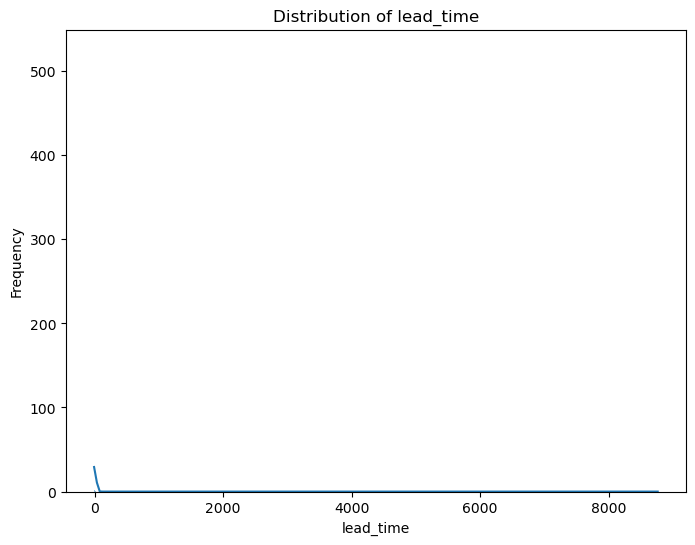

In [126]:
# Plot the distribution plot

plot_distributions(df, key_variables)

Column 'date_created' is not numeric and will not be plotted.
Column 'delivery_time' is not numeric and will not be plotted.


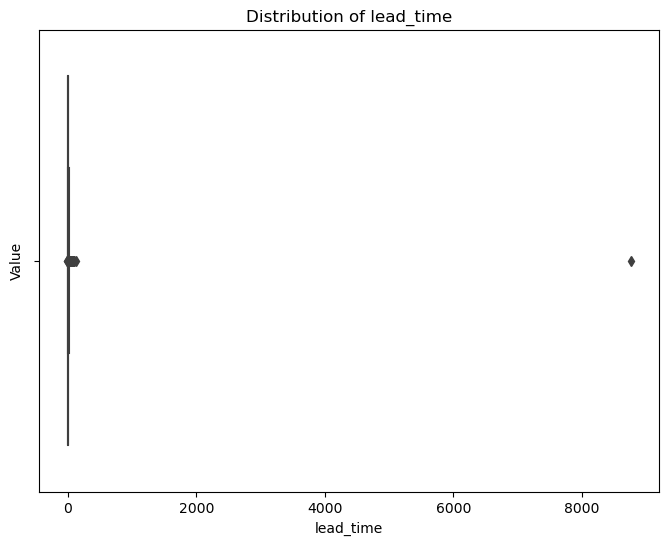

In [127]:
# plot a box plot

plot_boxplots(df, key_variables)

In [128]:
# Select numeric and datetime columns

selected_columns = df.select_dtypes(include=['number', 'datetime'])

In [129]:
selected_columns.head()

,date_created,delivery_time,lead_time
0,2024-05-01 05:24:01,2024-05-01 17:00:00,11.599722
1,2024-05-01 06:29:03,2024-05-01 13:23:00,6.899167
2,2024-05-01 06:31:34,2024-05-02 16:12:00,33.673889
4,2024-05-01 06:56:48,2024-05-01 12:00:00,5.053333
5,2024-05-01 06:57:10,2024-05-01 14:23:00,7.430556


In [130]:
# Create a Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [131]:
# Remove outliers for 'lead_time'
df_cl = remove_outliers(df, key_variables)

In [132]:
df_cl.head()

,hmo_id,prescription_code,name,date_created,status,delivery_status,delivery_time,lead_time
1,10136AVLC,294E6A17,Ijete,2024-05-01 06:29:03,Dispensed,Delivered,2024-05-01 13:23:00,6.899167
4,10054PVLA,850258F2,Abdullahi,2024-05-01 06:56:48,Dispensed,Delivered,2024-05-01 12:00:00,5.053333
5,10506OPAA,175FBA94,FAGBAMIGBE,2024-05-01 06:57:10,Dispensed,Delivered,2024-05-01 14:23:00,7.430556
6,10023EVGA,B8D45EBC,Ovie,2024-05-01 06:57:55,Dispensed,Delivered,2024-05-01 13:27:00,6.484722
8,10059OPBA,392A2E5B,Ogundare,2024-05-01 07:06:16,Dispensed,Delivered,2024-05-01 14:34:00,7.462222


In [133]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5339 entries, 1 to 6197
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hmo_id             5339 non-null   object        
 1   prescription_code  5339 non-null   object        
 2   name               5339 non-null   object        
 3   date_created       5339 non-null   datetime64[ns]
 4   status             5339 non-null   object        
 5   delivery_status    5339 non-null   object        
 6   delivery_time      5339 non-null   datetime64[ns]
 7   lead_time          5339 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 375.4+ KB


Column 'date_created' is not numeric and will not be plotted.
Column 'delivery_time' is not numeric and will not be plotted.


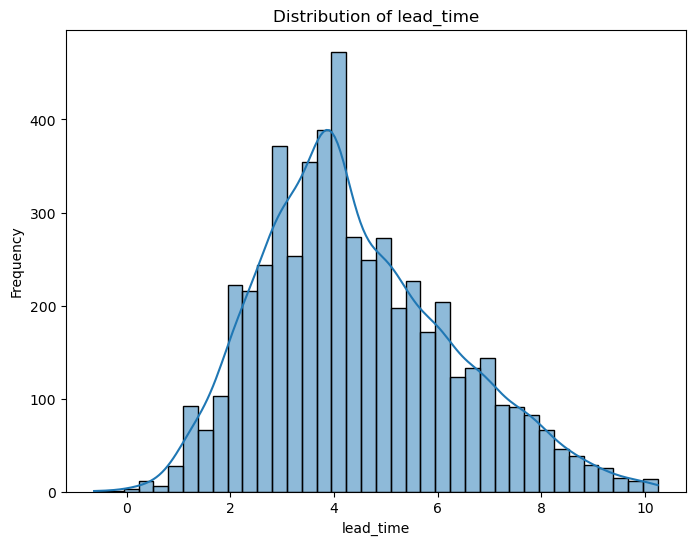

In [134]:
# distribution plot for df_cl

plot_distributions(df_cl, key_variables)

Column 'date_created' is not numeric and will not be plotted.
Column 'delivery_time' is not numeric and will not be plotted.


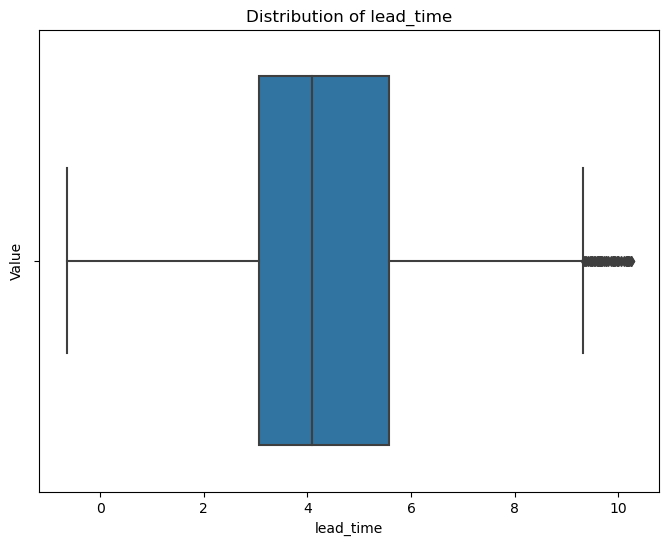

In [135]:
# Boxplot for df_cl

plot_boxplots(df_cl, key_variables)

In [136]:
# let print the summary statistics

df_cl.describe()

,date_created,delivery_time,lead_time
count,5339,5339,5339.000000
mean,2024-05-17 04:27:26.212211968,2024-05-17 13:29:18.497846016,4.432454
min,2024-05-01 06:29:03,2024-05-01 11:00:00,-0.633333
25%,2024-05-09 13:43:34.500000,2024-05-09 17:41:30,3.057917
50%,2024-05-16 22:15:18,2024-05-17 11:35:00,4.081667
75%,2024-05-24 13:58:16.500000,2024-05-24 17:27:30,5.566667
max,2024-05-31 23:43:52,2024-06-01 16:50:00,10.248611
std,NaN,NaN,1.840754


**Observation**
 - The presence of a negative lead_time signifies that there are delivery dates before date created which is likely due to faulty data entry

**Recommendation**
- Check for faulty entries and filter them out

In [137]:
df_cl.shape

(5339, 8)

In [138]:
df_cl[df_cl['lead_time'] < 0]

,hmo_id,prescription_code,name,date_created,status,delivery_status,delivery_time,lead_time
3054,10045PEOA,C9F47505,Monday,2024-05-16 10:10:16,Dispensed,Delivered,2024-05-16 10:00:00,-0.171111
4138,10243BHTA,F0B4B090,Enefiok,2024-05-21 20:03:02,Dispensed,Delivered,2024-05-22 07:22:00,-0.633333


**Observation**
- Error on 2763 occured due to faulty data entry
- Error on 3769 occured due to the condition for calculating the delivery time since all orders created after 4 PM and not delivered the same day are
considered as created time 8 AM the next day and delivery time is before the 8 am created time
calculation.

In [139]:
# Remove the negative values

df_cl = df_cl[df_cl['lead_time'] >= 0]
df_cl.describe()

,date_created,delivery_time,lead_time
count,5337,5337,5337.000000
mean,2024-05-17 04:26:23.273187328,2024-05-17 13:28:20.224845568,4.434265
min,2024-05-01 06:29:03,2024-05-01 11:00:00,0.000000
25%,2024-05-09 13:42:22,2024-05-09 17:40:00,3.058611
50%,2024-05-16 22:15:18,2024-05-17 11:35:00,4.082500
75%,2024-05-24 14:02:22,2024-05-24 17:34:00,5.566667
max,2024-05-31 23:43:52,2024-06-01 16:50:00,10.248611
std,NaN,NaN,1.838712


In [140]:
df_cl[df_cl['lead_time'] == 0.000000]

,hmo_id,prescription_code,name,date_created,status,delivery_status,delivery_time,lead_time
1016,10034DPDC,D81A55BF,CHIJIOKE,2024-05-06 19:00:14,Dispensed,Delivered,2024-05-07 08:00:00,0.0


**Observation**
- The prescription made after 4pm delivered exactly 8am the next day had 0.00 lead_time which seldome occurs but I'm going to make room for such records

Column 'date_created' is not numeric and will not be plotted.
Column 'delivery_time' is not numeric and will not be plotted.


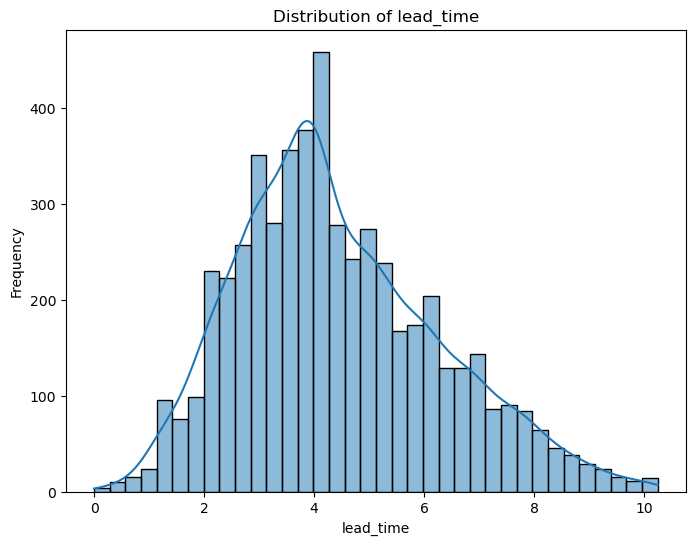

In [141]:
# Plot distribution for clean data

plot_distributions(df_cl, key_variables)

Column 'date_created' is not numeric and will not be plotted.
Column 'delivery_time' is not numeric and will not be plotted.


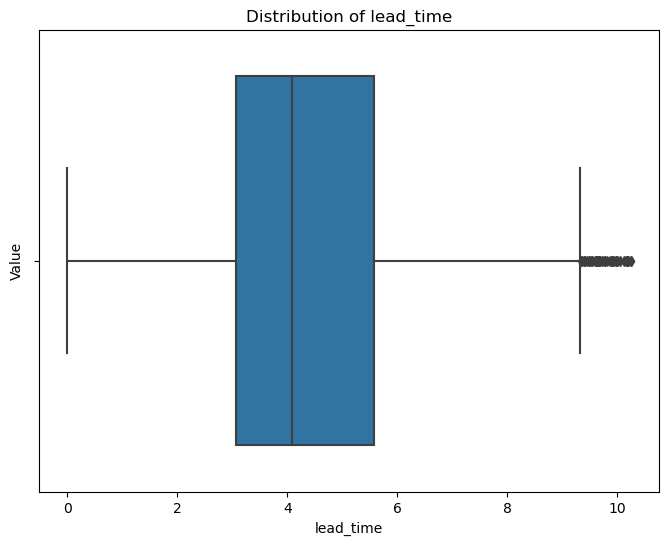

In [142]:
# plot a boxplot for clean data

plot_boxplots(df_cl, key_variables)

### Save the Cleaned data into an outputexcel format

In [143]:
# copy the cleaned data into a new dataframe called df_cleaned

df_cleaned = df_cl.copy()

# Set file name to Assessment_Data_Output as output DataFrame
file_path = 'Assessment_Data_Output.xlsx'
df_cleaned.to_excel(file_path, index=False)